<a href="https://colab.research.google.com/github/mkm-world/Loan-Credit-Worthiness-Prediction/blob/main/Loan_Credit_Worthiness_Prediction_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Loan Creditworthiness: Baseline Approach


This starter notebook provides a baseline, simple approach to the Bluechip Data & AI 2024 Summit Hackathon on **Predicting Loan Creditworthiness**.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [3]:
variable_def = pd.read_excel('Variable_def.xlsx')
variable_def

,ID: Unique ID for each observation
0,Loan_ID: A unique loan ID.
1,Gender: Either male or female.
2,Married: Weather Married(yes) or Not Marttied(...
3,Dependents: Number of persons depending on the...
4,Education: Applicant Education(Graduate or Und...
5,Self_Employed: Self-employed (Yes/No).
6,ApplicantIncome: Applicant income.
7,CoapplicantIncome: Co-applicant income.
8,LoanAmount: Loan amount in thousands.
9,Loan_Amount_Term: Terms of the loan in months.


In [4]:
###### test = pd.read_csv(input_dir + "Test.csv")

test.shape

(2528, 14)

In [5]:
train.shape

(5898, 15)

In [6]:
sample_sub = pd.read_csv("Sample Submission.csv")

sample_sub.head()

,ID,Loan_Status
0,70607,NaN
1,58412,NaN
2,88755,NaN
3,97271,NaN
4,70478,NaN


## Data Cleaning and Preprocessing

### Missing Values Check

In [7]:
train.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [8]:
test.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

Both the train and test sets contain no missing values.

# Data Visualization

In [9]:
train['Loan_Status'].value_counts()

1    4913
0     985
Name: Loan_Status, dtype: int64

In [10]:
for x in train:
    print(train[x].value_counts())

74768    1
52017    1
66995    1
67421    1
26778    1
        ..
55061    1
57095    1
53863    1
73654    1
84112    1
Name: ID, Length: 5898, dtype: int64
LP002585    767
LP002187    740
LP002231    718
LP002175    463
LP002224    364
           ... 
LP001199      1
LP002386      1
LP001637      1
LP001073      1
LP001565      1
Name: Loan_ID, Length: 457, dtype: int64
1    5372
0     526
Name: Gender, dtype: int64
1    5040
0     858
Name: Married, dtype: int64
0     3659
1     1157
3+     546
2      536
Name: Dependents, dtype: int64
0    5189
1     709
Name: Education, dtype: int64
0    5263
1     635
Name: Self_Employed, dtype: int64
150      879
81000     43
8421      11
8415      11
8412       9
        ... 
31822      1
2018       1
7847       1
853        1
2230       1
Name: ApplicantIncome, Length: 3708, dtype: int64
0.000000        2749
20000.000000      30
3391.175054        1
557.097981         1
484.404624         1
                ... 
1706.136926        1
462.283710 

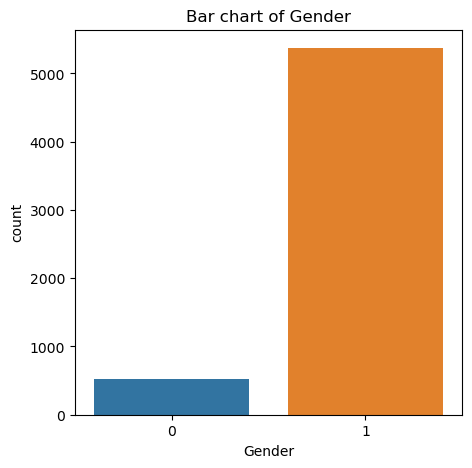

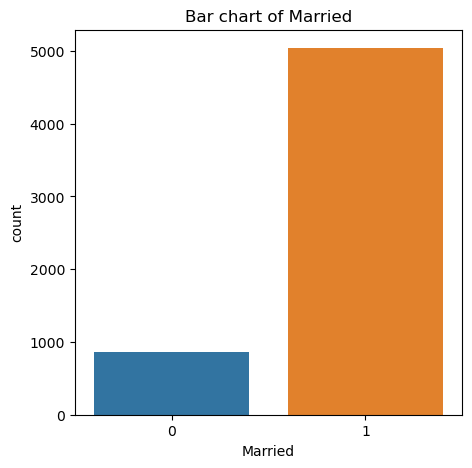

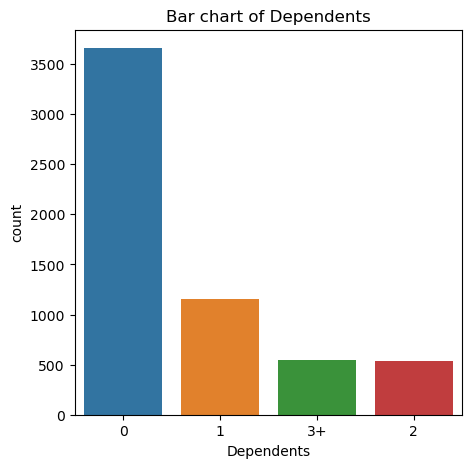

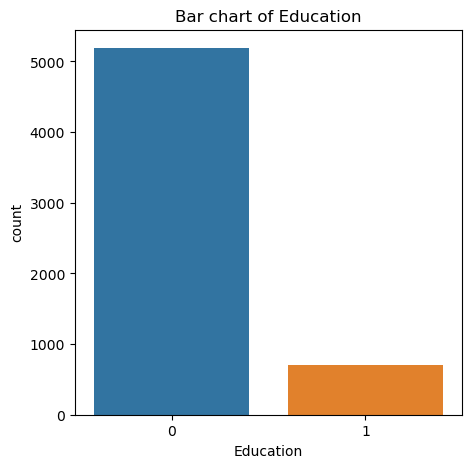

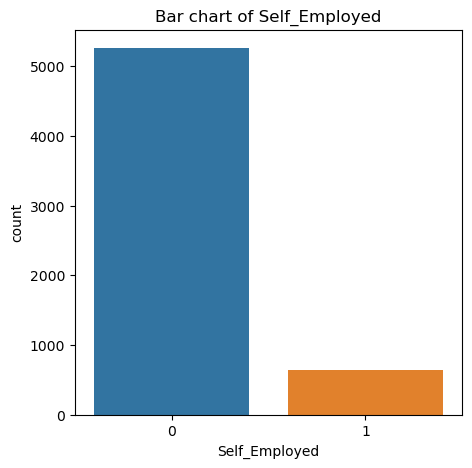

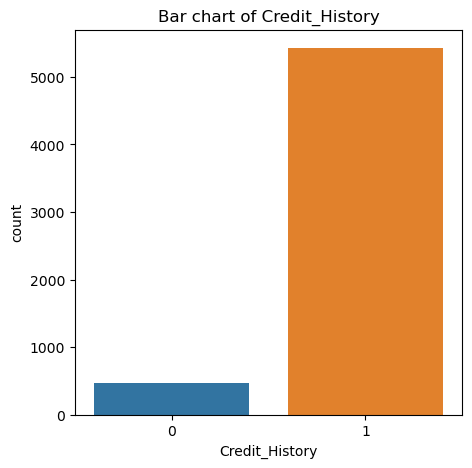

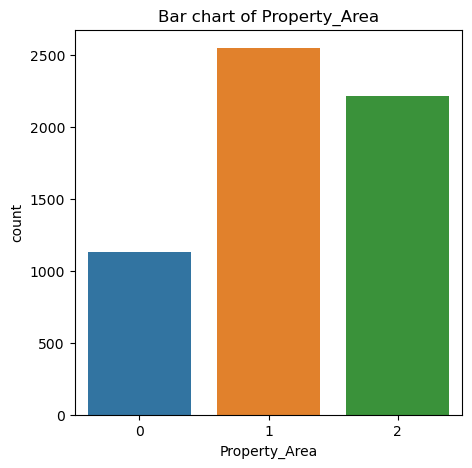

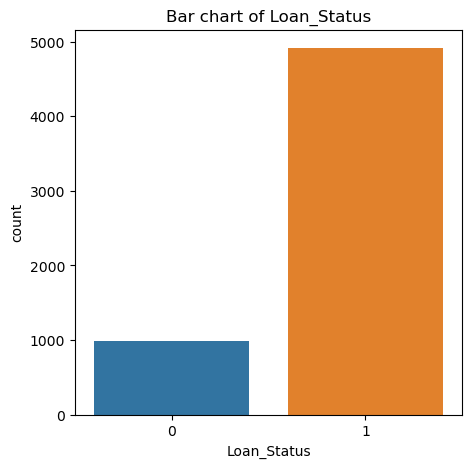

In [11]:
categ_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in categ_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(data = train, x = i)
    plt.title(f"Bar chart of {i}")

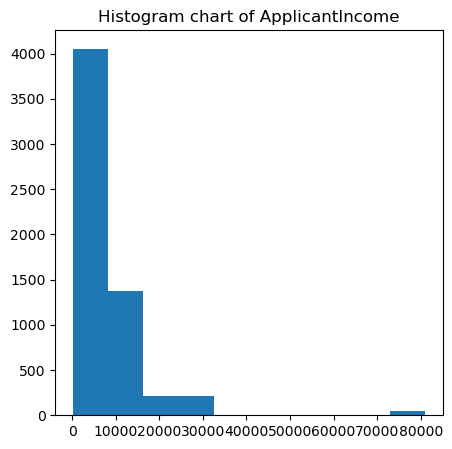

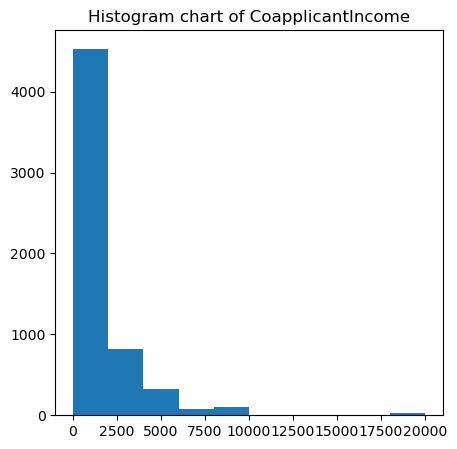

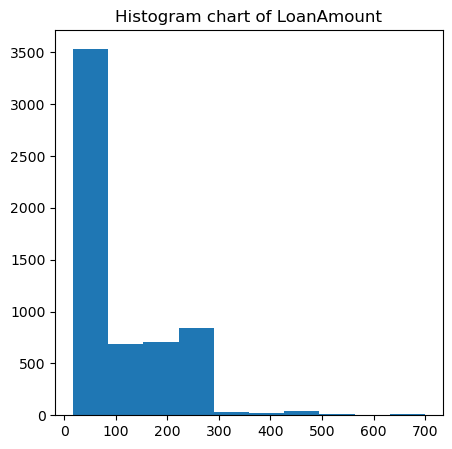

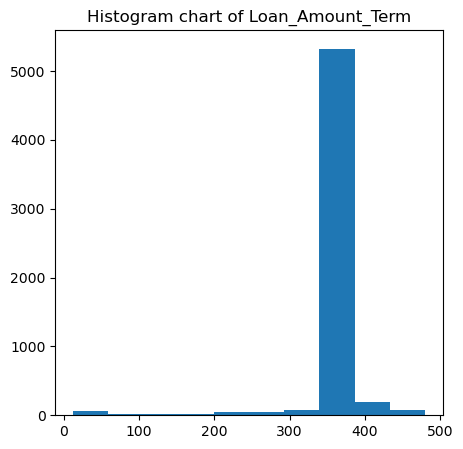

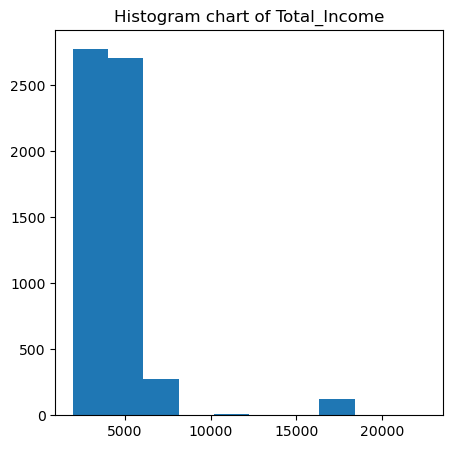

In [12]:
other_cols = train.drop(categ_cols, axis =1)
other_cols = other_cols.drop(['ID','Loan_ID'], axis =1)
for i in other_cols:
    plt.figure(figsize=(5,5))
    plt.hist(data = other_cols, x = i)
    plt.title(f"Histogram chart of {i}")

# Outliers detection with boxplot

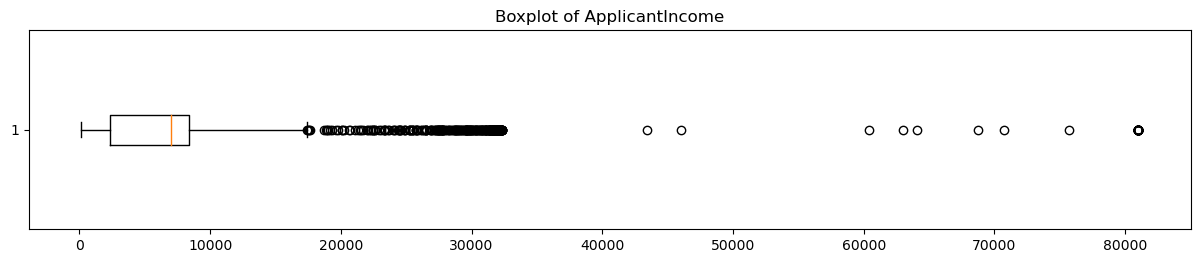

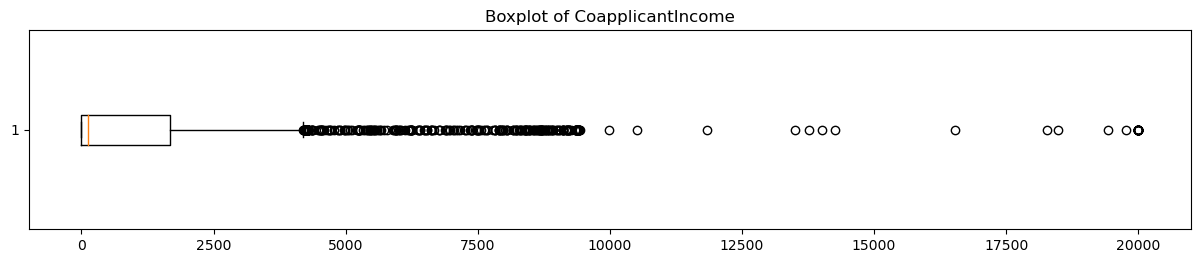

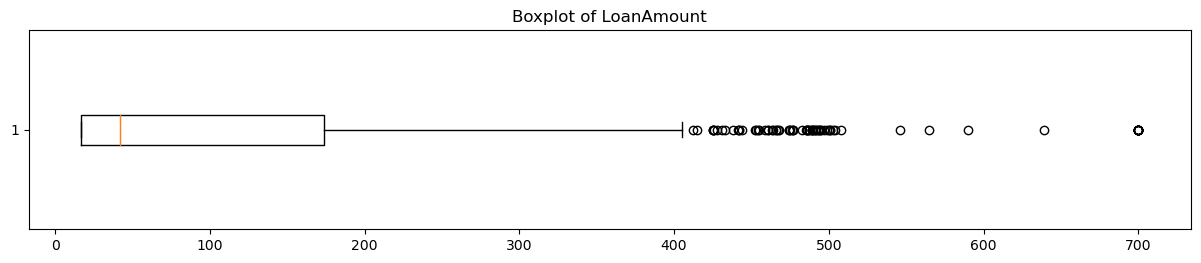

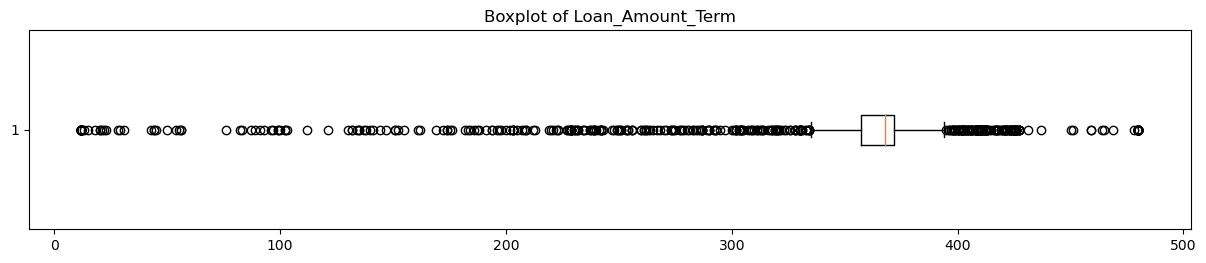

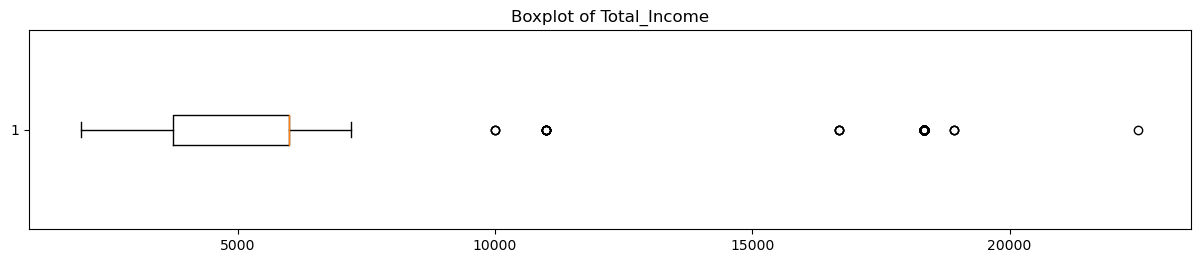

In [13]:
#other_cols = other_cols.column
color = sns.color_palette()[0]
for i in range(len(other_cols.columns)):
    plt.figure(figsize = [15, 15])
    plt.subplot(len(other_cols.columns) , 1, i+1)
    plt.boxplot(data = other_cols, x = other_cols.columns[i], vert = False)
    plt.title(f'Boxplot of {other_cols.columns[i]}')

# Outliers treatment

### Checking Data Types

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2528 non-null   int64  
 1   Loan_ID            2528 non-null   object 
 2   Gender             2528 non-null   int64  
 3   Married            2528 non-null   int64  
 4   Dependents         2528 non-null   object 
 5   Education          2528 non-null   int64  
 6   Self_Employed      2528 non-null   int64  
 7   ApplicantIncome    2528 non-null   int64  
 8   CoapplicantIncome  2528 non-null   float64
 9   LoanAmount         2528 non-null   int64  
 10  Loan_Amount_Term   2528 non-null   int64  
 11  Credit_History     2528 non-null   int64  
 12  Property_Area      2528 non-null   int64  
 13  Total_Income       2528 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 276.6+ KB


Only two columns, **Loan_ID** and **Dependents** have non-numeric data type. The Loan_Is is not of impoprtance at the moment, so we will  be dropping it. And for the Dependents columnm, we will be performing one hot encoding with the use of the `pd.get_dummies()` method.

### One-Hot Encoding

In [16]:
train_processed = pd.get_dummies(train, columns=['Dependents'])
test_processed = pd.get_dummies(test, columns=['Dependents'])

### Feature Selection

In [17]:
features = train_processed.columns.difference(['ID', 'Loan_Status', 'Loan_ID'])

X = train_processed[features]
y = train_processed['Loan_Status']

## Data Splitting

In [18]:
# splitting into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [19]:
X_train

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,Total_Income
3367,3730,0.000000,1,0,1,0,0,0,1,54,365,1,2,0,3750
3354,2199,338.269206,1,0,0,0,1,0,1,17,385,1,2,1,3750
5360,7713,0.000000,1,1,0,0,0,0,1,80,354,0,2,0,7200
2642,4831,3797.641281,1,1,0,0,0,0,1,195,373,1,1,0,3750
4705,150,297.624960,1,0,0,1,0,0,1,99,372,1,0,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,150,1169.787994,1,1,0,0,0,0,1,255,382,1,1,0,3750
5016,4770,289.659910,1,1,0,0,0,0,1,233,362,1,0,0,3750
4948,8093,0.000000,0,1,0,0,0,0,1,39,370,1,2,0,7200
1085,7755,0.000000,1,1,0,0,0,0,1,17,369,1,1,0,6000


# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train[other_cols.columns] = scaler.fit_transform(X_train[other_cols.columns])
X_test[other_cols.columns] = scaler.transform(X_test[other_cols.columns])
X_train

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,Total_Income
3367,-0.447582,-0.517049,1,0,1,0,0,0,1,-0.420379,0.135037,1,2,0,-0.653676
3354,-0.615935,-0.376762,1,0,0,0,1,0,1,-0.779451,0.530173,1,2,1,-0.653676
5360,-0.009599,-0.517049,1,1,0,0,0,0,1,-0.168058,-0.082288,0,2,0,0.853770
2642,-0.326512,1.057906,1,1,0,0,0,0,1,0.947978,0.293092,1,1,0,-0.653676
4705,-0.841249,-0.393618,1,0,0,1,0,0,1,0.016331,0.273335,1,0,1,-0.653676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,-0.841249,-0.031915,1,1,0,0,0,0,1,1.530258,0.470903,1,1,0,-0.653676
5016,-0.333220,-0.396921,1,1,0,0,0,0,1,1.316755,0.075767,1,0,0,-0.653676
4948,0.032187,-0.517049,0,1,0,0,0,0,1,-0.565949,0.233821,1,2,0,0.853770
1085,-0.004981,-0.517049,1,1,0,0,0,0,1,-0.779451,0.214064,1,1,0,0.329441


## Modeling

### Import Models

In [1]:
!pip install catboost
#X_train.shape

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\new\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\new\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\new\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\new\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\new\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\new\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\new\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\new\anaconda3\lib\ssl.py", line 1

                                             0.3/101.8 MB 11.1 kB/s eta 2:32:18


In [2]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'catboost'

### Logistic regression

In [30]:
# train Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.8332203389830508

### Random Forest

In [31]:
# train random forest model
rf = RandomForestClassifier(max_depth = 8, random_state = 42, n_estimators= 1000)
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.8332203389830508

### XGBoost

In [33]:
# train xgboost model
xgb = XGBClassifier(max_depth = 4, random_state = 42, n_estimators= 400, learning_rate = 0.05)
xgb.fit(X_train, y_train)

# make predictions
y_pred = xgb.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.8298305084745763

In [35]:
np. mean(cross_val_score(xgb, X_test, y_test, cv = 10))

0.8250873322301894

In [36]:
np. mean(cross_val_score(log_reg, X_test, y_test, cv = 10))

0.8332276153704725

In [37]:
np. mean(cross_val_score(rf, X_test, y_test, cv = 10))

0.8332276153704725

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# # Initialize the model
rf = RandomForestClassifier()

# # Perform grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# grid_search.fit(scaled_x_train, y_train)

# # Best parameters
# print("Best parameters found: ", grid_search.best_params_)


# Performing GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best model from GridSearchCV
best_model_grid = grid_search.best_estimator_
#depth_grid = best_model_grid.get_depth()
#params_grid = best_model_grid.get_params()

# Predicting on train and test sets using the best model from GridSearchCV
y_train_pred_grid = best_model_grid.predict(X_train)
y_test_pred_grid = best_model_grid.predict(X_test)

accuracy_score(y_train, y_train_pred_grid)

0.8641193759891477

In [41]:
accuracy_score(y_test, y_test_pred_grid)

0.8325423728813559

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
y_train_pred_grid = best_model_grid.predict(X_train)
y_test_pred_grid = best_model_grid.predict(X_test)

accuracy_score(y_train, y_train_pred_grid)

{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


0.8641193759891477

In [43]:
accuracy_score(y_test, y_test_pred_grid)

0.8325423728813559

In [45]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
# make predictions
y_pred = xgb.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

KeyboardInterrupt: 

### CatBoost

## Make predictions - Generate submission file


### Re-train model on the whole data

In [27]:
# re-train best performing model on whole data - random forest
rf = RandomForestClassifier(max_depth = 8, random_state = 42, n_estimators= 1000)
rf.fit(X, y)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=42)

In [28]:
# make predictions
y_pred = rf.predict(X_test)

# evaluate model
accuracy_score(y_test, y_pred)

0.8332203389830508

### Make predictions on the test dataset

## Next Steps
- Exploratory Data Analysis (EDA) to help understand the data and uncover inisghts that might aid feature engineering
- Hyper-paramater Tuning - explore manual tuning, GridSearch, Optuna
- Cross Validation with KFold.
- Ensembling Methods; thow heads are better than one.

In [ ]:
from sklearn.model_selection import DummyClassifier